# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data import

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
data = pd.read_csv('Wholesale_Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


dataset is based off groceries

### Data cleaning

In [102]:
# find missing or null values
data.isnull().sum()
data.isna().sum()

# find duplicate rows
duplicate_rows = data[data.duplicated()]
duplicate_rows

# find unique values in each column
unique_values = data.nunique()
unique_values

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

- No missing or null values 
- No duplicates rows
- unique values match number of rows

In [103]:
# rename column
data.rename(columns = {'Delicassen':'Deli'}, inplace = True)

### Data description

In [104]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [105]:
# median of each column
median = data.median()
median

Channel                1.0
Region                 3.0
Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Deli                 965.5
dtype: float64

Statistical description of columns including mean, median, and standard deviation.

### Data visualization

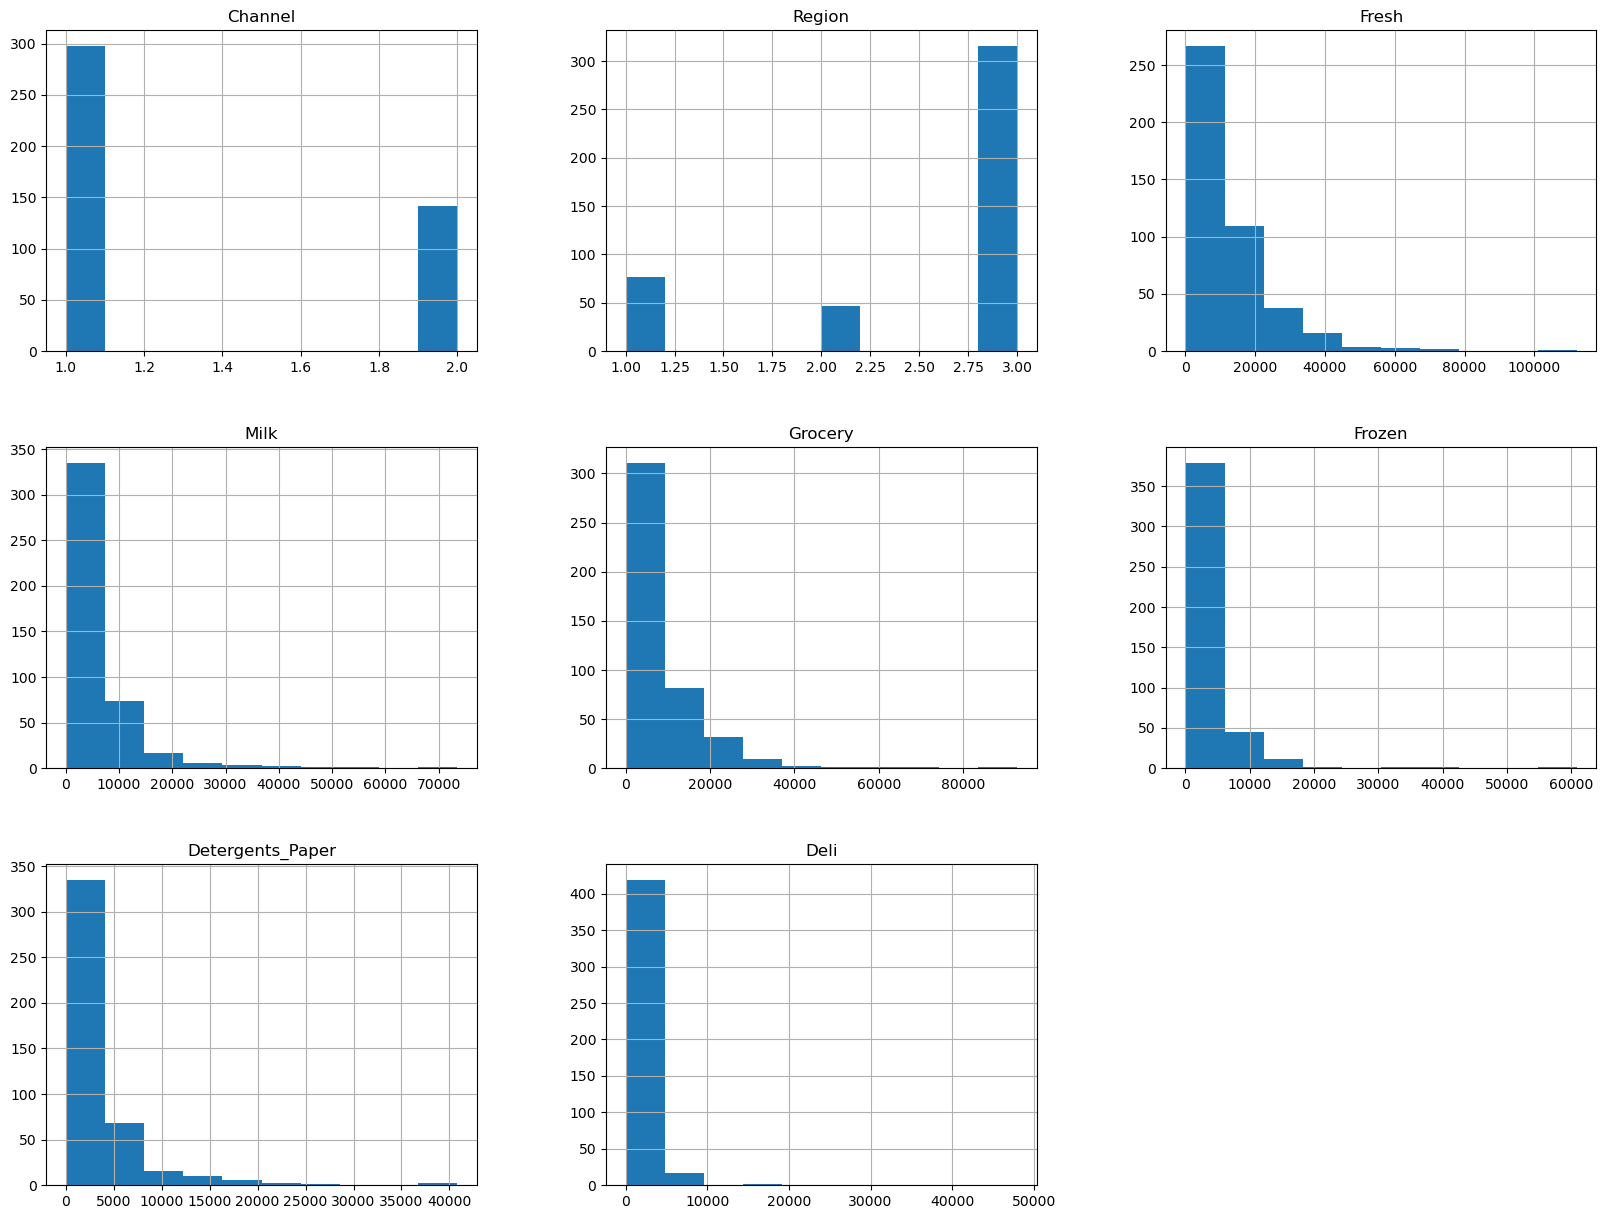

In [106]:
# data distribution
data.hist(bins=10, figsize=(20, 15))
plt.show()

<Axes: >

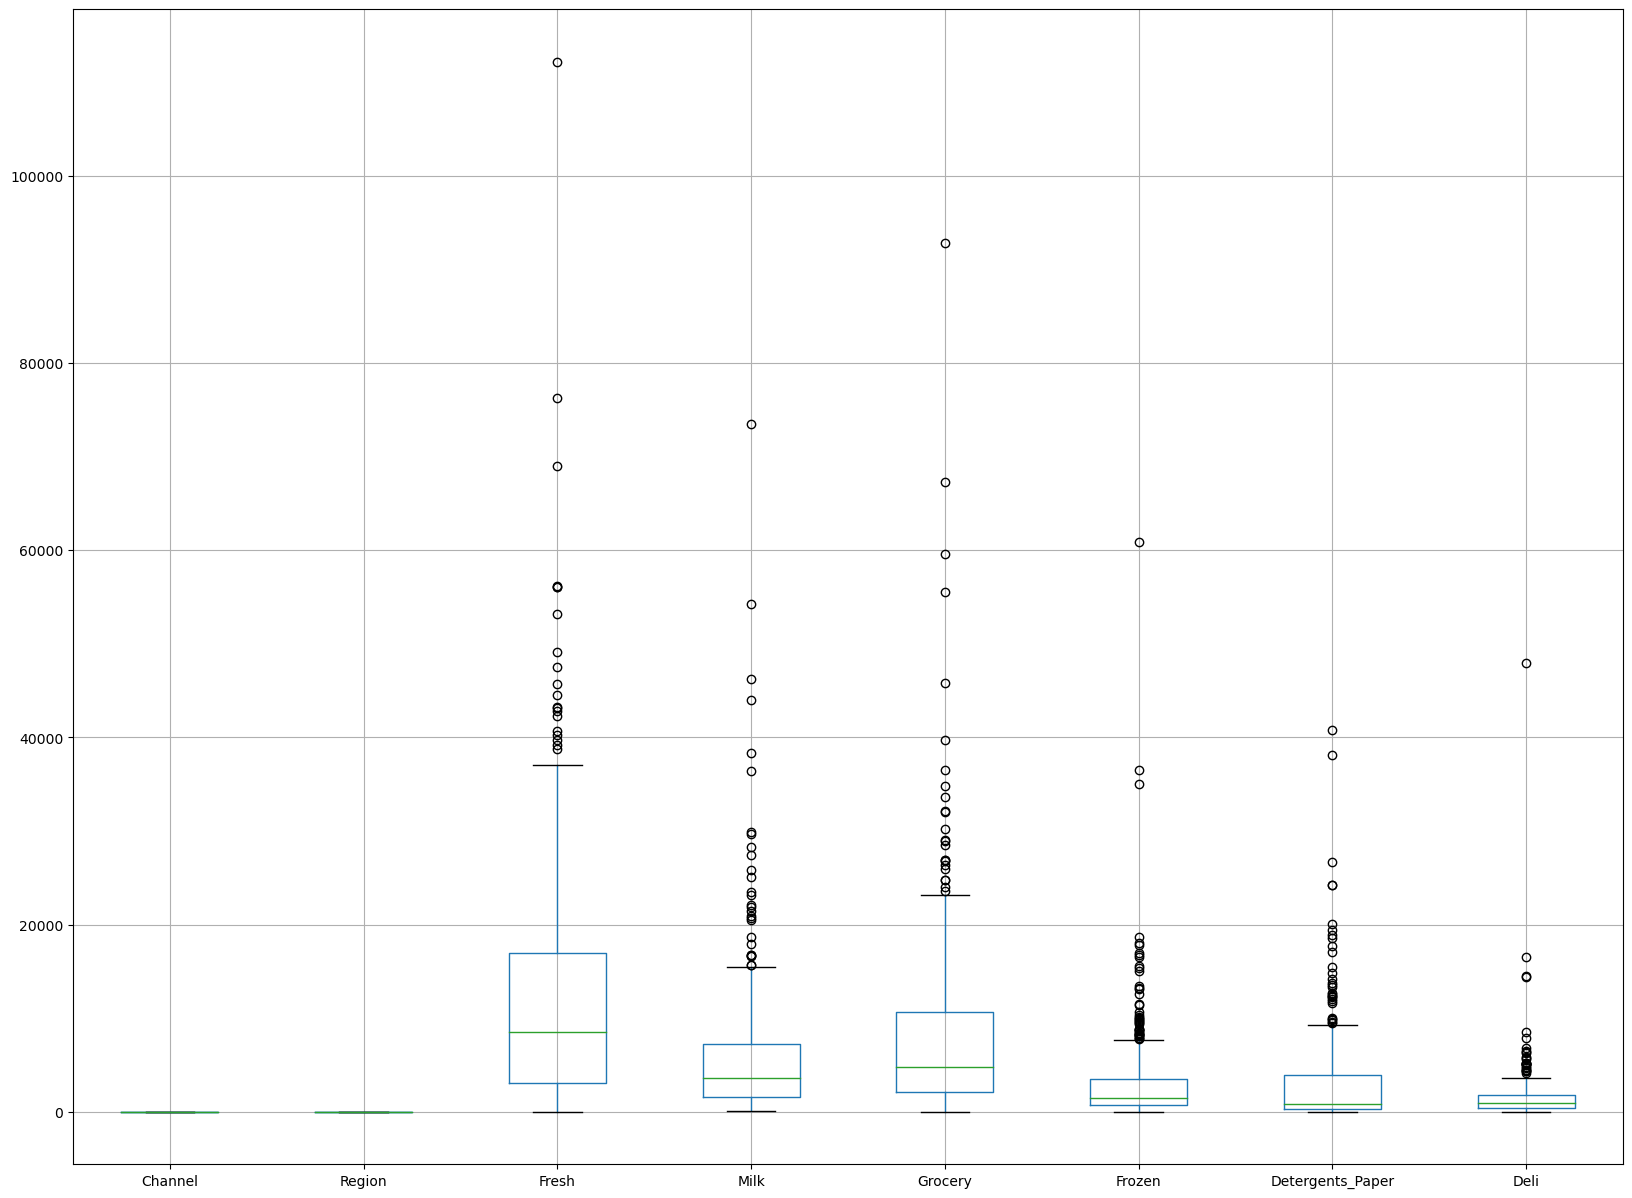

In [107]:
data.boxplot(figsize=(20, 15))

We can see a lot of outliers in this boxplot.

In [108]:
# count number of outliers
outliers = []
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers.append(data[(data[col] < lower) | (data[col] > upper)].shape[0])
outliers = pd.Series(outliers, index=data.columns)
outliers

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Deli                27
dtype: int64

<Axes: >

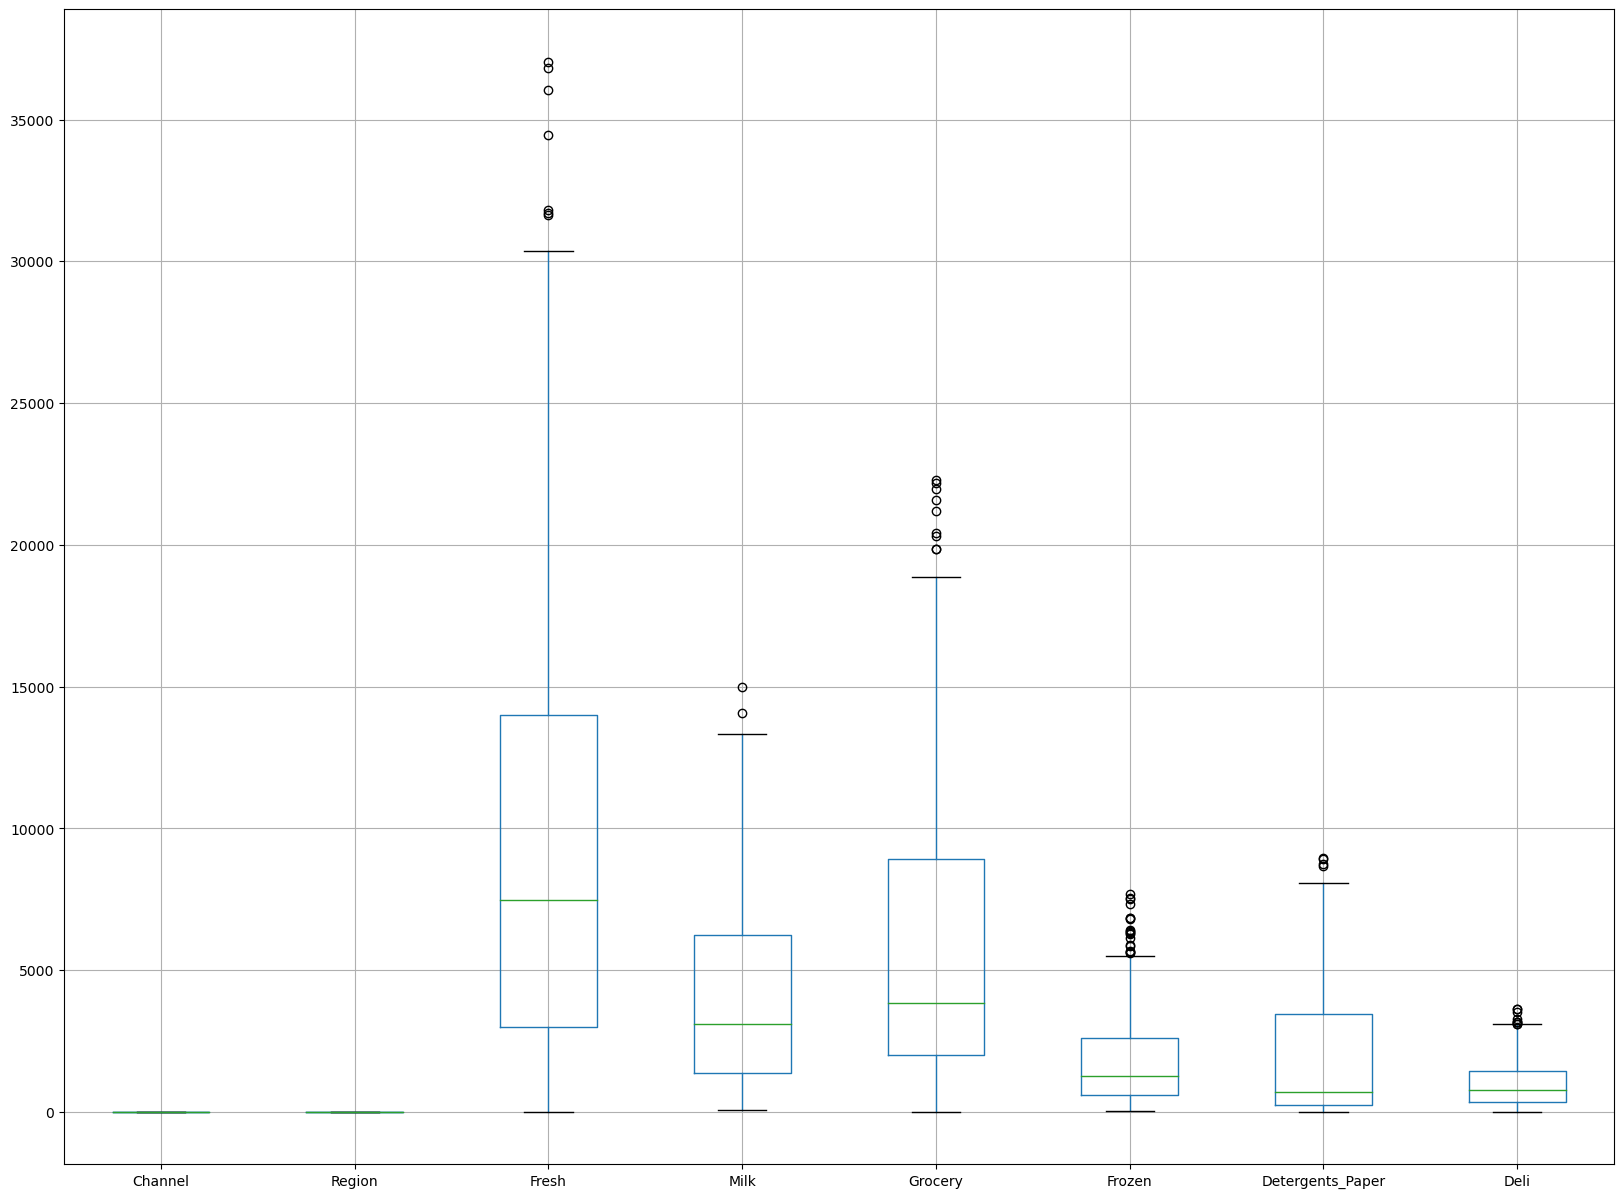

In [109]:
# remove outliers in fresh column
FQ1 = data['Fresh'].quantile(0.25)
FQ3 = data['Fresh'].quantile(0.75)
FIQR = FQ3 - FQ1
Flower = FQ1 - (1.5 * FIQR)
Fupper = FQ3 + (1.5 * FIQR)

# remove outliers in milk column
MQ1 = data['Milk'].quantile(0.25)
MQ3 = data['Milk'].quantile(0.75)
MIQR = MQ3 - MQ1
Mlower = MQ1 - (1.5 * MIQR)
Mupper = MQ3 + (1.5 * MIQR)

# remove outliers in grocery column
GQ1 = data['Grocery'].quantile(0.25)
GQ3 = data['Grocery'].quantile(0.75)
GIQR = GQ3 - GQ1
Glower = GQ1 - (1.5 * GIQR)
Gupper = GQ3 + (1.5 * GIQR)

# remove outliers in frozen column
FrQ1 = data['Frozen'].quantile(0.25)
FrQ3 = data['Frozen'].quantile(0.75)
FrIQR = FrQ3 - FrQ1
Frlower = FrQ1 - (1.5 * FrIQR)
Frupper = FrQ3 + (1.5 * FrIQR)

# remove outliers in detergents_paper column
DpQ1 = data['Detergents_Paper'].quantile(0.25)
DpQ3 = data['Detergents_Paper'].quantile(0.75)
DpIQR = DpQ3 - DpQ1
Dplower = DpQ1 - (1.5 * DpIQR)
Dpupper = DpQ3 + (1.5 * DpIQR)

# remove outliers in delicassen column
DQ1 = data['Deli'].quantile(0.25)
DQ3 = data['Deli'].quantile(0.75)
DIQR = DQ3 - DQ1
Dlower = DQ1 - (1.5 * DIQR)
Dupper = DQ3 + (1.5 * DIQR)

# remove outliers
data = data[(data['Fresh'] > Flower) & (data['Fresh'] < Fupper) & (data['Milk'] > Mlower) & (data['Milk'] < Mupper) & (data['Grocery'] > Glower) & (data['Grocery'] < Gupper) & (data['Frozen'] > Frlower) & (data['Frozen'] < Frupper) & (data['Detergents_Paper'] > Dplower) & (data['Detergents_Paper'] < Dpupper) & (data['Deli'] > Dlower) & (data['Deli'] < Dupper)]

# data distribution after removing outliers
data.boxplot(figsize=(20, 15))

In [110]:
# count number of outliers after removing
outliers = []
for col in data.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers.append(data[(data[col] < lower) | (data[col] > upper)].shape[0])
outliers = pd.Series(outliers, index=data.columns)
outliers

Channel              0
Region               0
Fresh                7
Milk                 2
Grocery              9
Frozen              19
Detergents_Paper     4
Deli                 9
dtype: int64

- number of outliers decreased significantly after using the inquartile range method to remove them
- some outliers remain but it is important to keep some since they are apart of the dataset and contribute to the distribution variance
    - in real life, outliers are important to account for, not everything will fit perfectly

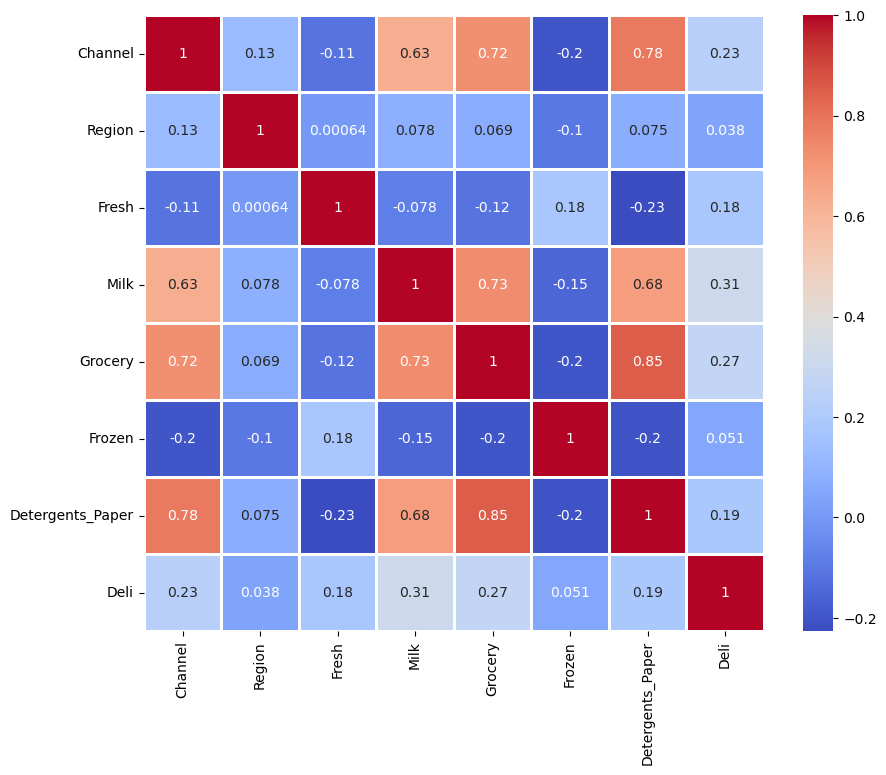

In [111]:
# heatmap 
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=2)
plt.show()

A visual representation of the relationships between features. 
Values coloured orange describe a strong positive relationship.
The more blue a value is, the weaker the relationship. 

### Correlation analysis

In [112]:
# data correlation matrix
correlation = data.corr()
correlation

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
Channel,1.000000,0.126127,-0.113467,0.628692,0.722198,-0.199590,0.784068,0.230007
Region,0.126127,1.000000,0.000641,0.077833,0.068735,-0.099538,0.075176,0.038446
Fresh,-0.113467,0.000641,1.000000,-0.078081,-0.116159,0.184733,-0.226385,0.179424
Milk,0.628692,0.077833,-0.078081,1.000000,0.727206,-0.154348,0.683223,0.313687
Grocery,0.722198,0.068735,-0.116159,0.727206,1.000000,-0.199533,0.854322,0.273234
Frozen,-0.199590,-0.099538,0.184733,-0.154348,-0.199533,1.000000,-0.203810,0.050886
Detergents_Paper,0.784068,0.075176,-0.226385,0.683223,0.854322,-0.203810,1.000000,0.188180
Deli,0.230007,0.038446,0.179424,0.313687,0.273234,0.050886,0.188180,1.000000


- grocery and milk have a strong positive relationship of 0.73
- grocery and detergents_paper have a strong positive relationship of 0.92

### Data transformation

In [113]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[ 1.5794736 ,  0.59009178,  0.38304079, ..., -0.96700429,
         0.30505322,  0.3904653 ],
       [ 1.5794736 ,  0.59009178, -0.30558788, ..., -0.05925481,
         0.56913935,  0.92259064],
       [-0.63312233,  0.59009178,  0.45617384, ...,  2.66282084,
        -0.61946154,  0.93716941],
       ...,
       [-0.63312233,  0.59009178,  0.88147444, ..., -0.68904999,
         0.17578328, -0.21698372],
       [-0.63312233,  0.59009178,  0.09112211, ..., -0.48380948,
        -0.76409029,  1.34659005],
       [-0.63312233,  0.59009178, -0.82954447, ..., -1.05437811,
        -0.63226055, -1.17189357]])

### Feature selection

In [114]:
# small variance in data
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=0.1)
variance.fit(data_scaled)
variance.get_support()

# remove columns with small variance
select_data = data.columns[variance.get_support()]
data = data[select_data]
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Deli
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


- found features with small variance and removed the column

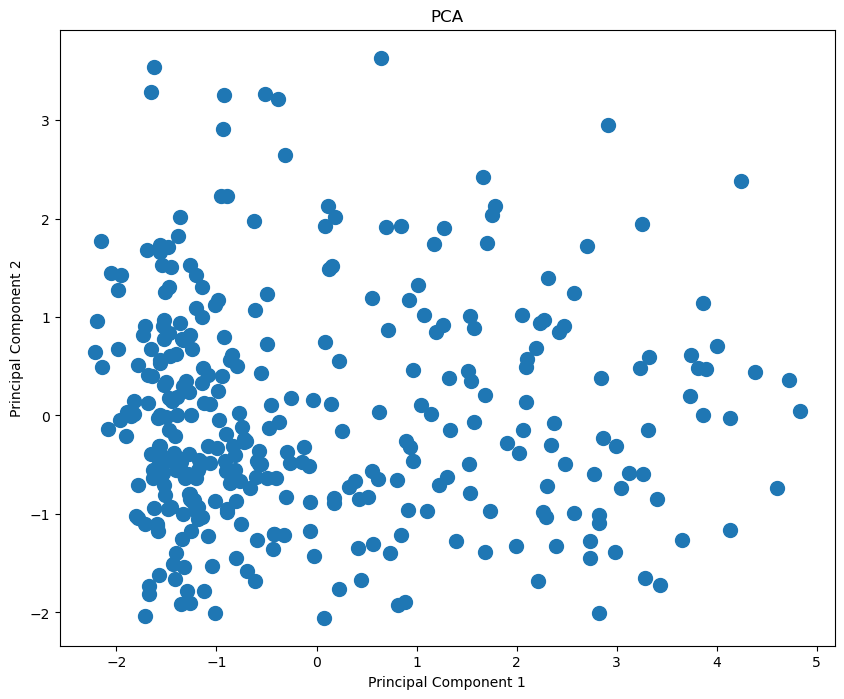

In [159]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Deli']
categorical = ['Channel', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)])

pca = PCA(n_components=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('pca', pca)])

data_pca = pipeline.fit_transform(data)

# plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [160]:
pca.explained_variance_ratio_

array([0.43484054, 0.18961412])

This plot describes 62% of the variance. PC1 explains 43%, and PC2 explains 19%. (rounded values)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. 

To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [166]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# fit model
km = KMeans(n_clusters=3, n_init=10, random_state=42)
km.fit(data_pca)

# predict clusters
y_km = km.predict(data_pca)

In [167]:
# make function to plot clusters
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, label=f'Cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, s=50, marker='s', label='Centroids')

    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

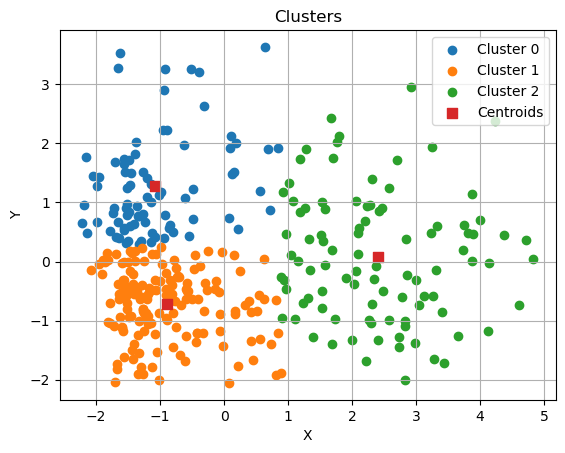

In [168]:
plot_clusters(data_pca, y_km, plt_cluster_centers=True)

We have found the centroids for the clusters, but we need to find the optimum number of clusters. We need to implement the elbow rule to do this.

In [171]:
# elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i, n_init=10, random_state=42)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

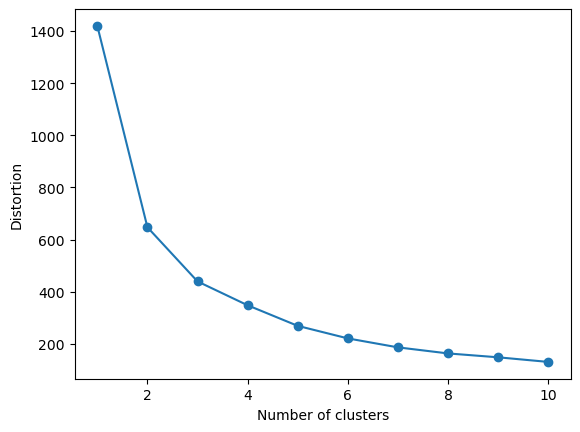

In [172]:
# plot elbow rule
plot_distortion(data_pca,max_clusters=10)

We can see that the distortion starts to plateau around 4 clusters. There is no dramatic drop in distortion. 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [173]:
# generate clusters
x,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# plot clusters
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x, y, label=f'Cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids, Y_centroids, s=50, marker='s', label='Centroids')

    plt.title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

In [174]:
# cluster hierarchy 
import scipy.cluster.hierarchy as sch

# dendogram
def plot_dendogram(X, method='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title('Dendrogram')
    plt.xlabel('Points')
    plt.ylabel('Euclidean distances')
    plt.show()

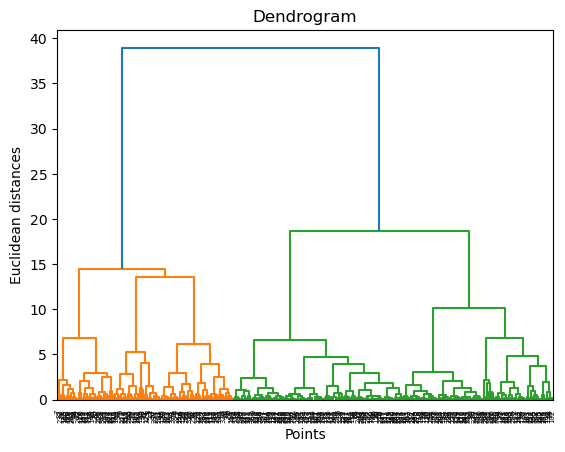

In [175]:
plot_dendogram(data_pca)

The dendrogram displays that there are 2 optimal clusters. 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

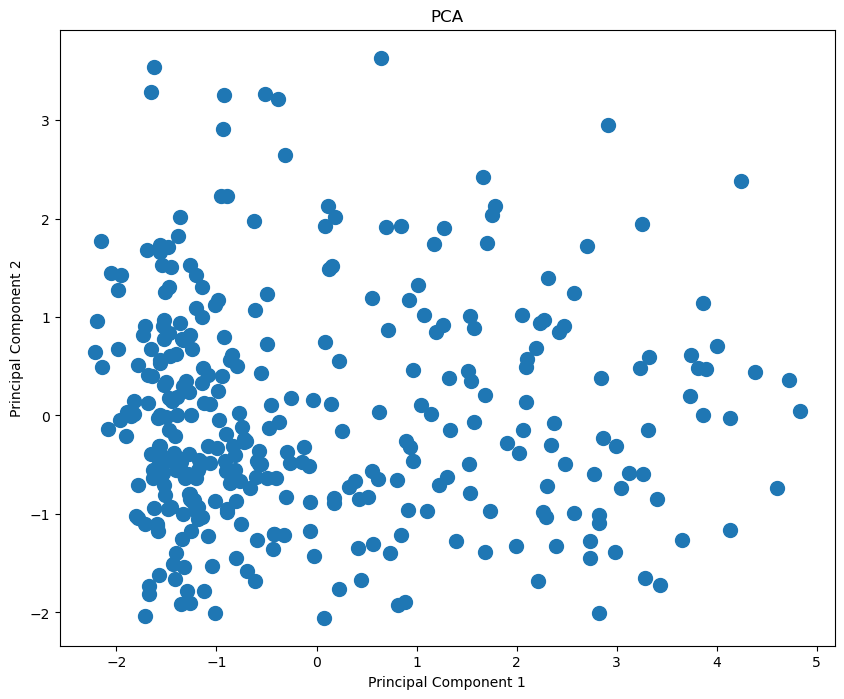

In [180]:
PCA
numerical = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Deli']
categorical = ['Channel', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)])

pca = PCA(n_components=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('pca', pca)])

data_pca = pipeline.fit_transform(data)

# plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


lots of variability in the data but lack of distinct clusters shows that we require more than 2 components to understand data

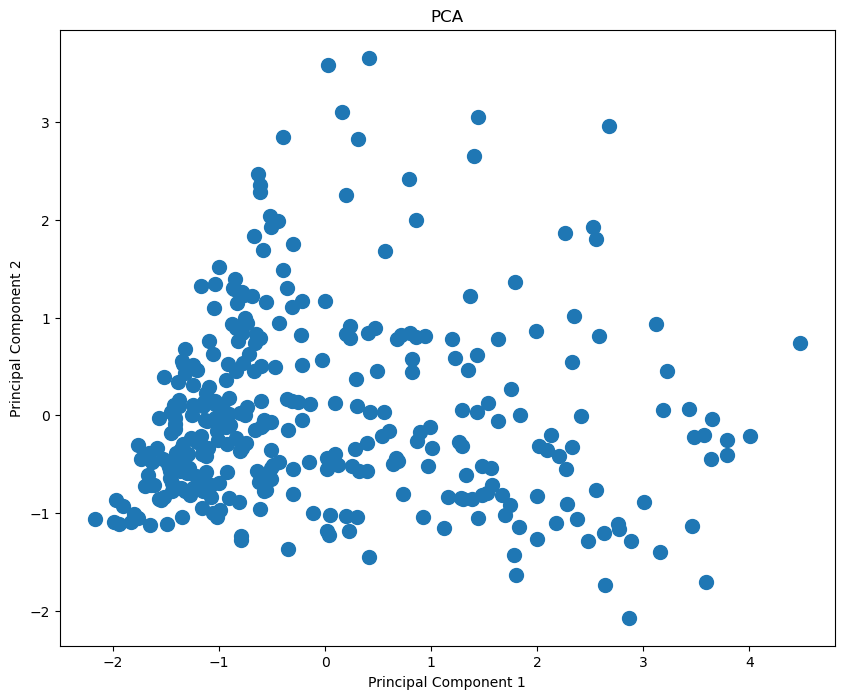

In [184]:
# compound combination of features 
data['Fresh_Milk'] = data['Fresh'] + data['Milk']
data['Grocery_Frozen'] = data['Grocery'] + data['Frozen']
data['Detergents_Paper_Deli'] = data['Detergents_Paper'] + data['Deli']

# PCA
numerical = ['Fresh_Milk', 'Grocery_Frozen', 'Detergents_Paper_Deli']
categorical = ['Channel', 'Region']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)])

pca = PCA(n_components=2)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('pca', pca)])

data_pca = pipeline.fit_transform(data)

# plot PCA
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=100)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Since there aren't any clear clusters, it may suggest that customers are relatively similar in how they shop.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Grocery and detergent_paper have a high positively correlation (85%), which means customers tend to purchase items from these categories often.
2. When we group these features up based off attribute similarities, there are 3 main groups.
3. Customers have similar shopping habits.
4. Some outliers were kept. Variability is important in this dataset and the outliers contribute to that. Not all customers shop the same way and these customers should be accounted for in our data.